In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Project Planning
- Audience: potential consumers planning airline travel.
- Utilize classification modeling to determine if a flight will be delayed.
- Find key features that drive flight delays.

**Initial Hypothesis**
- Time of day will impact delay times.
- Day of the week will impact delay times. 
- Carrier will impact delay times.
- Airport location will impact delay times.



**Additional data requested for better analysis.**



#### What's in the data?
- **Year** 2008
- **Month** 1-12
- **DayofMonth** 1-31
- **DayOfWeek** 1 (Monday) - 7 (Sunday)
- **DepTime** actual departure time (local, hhmm)
- **CRSDepTime** scheduled departure time (local, hhmm)
- **ArrTime** actual arrival time (local, hhmm)
- **CRSArrTime** scheduled arrival time (local, hhmm)
- **UniqueCarrier** unique carrier code
- **FlightNum** flight number
- **TailNum** plane tail number: aircraft registration, unique aircraft identifier
- **ActualElapsedTime** in minutes
- **CRSElapsedTime** in minutes
- **AirTime** in minutes
- **ArrDelay** arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
- **DepDelay** departure delay, in minutes
- **Origin** origin IATA airport code
- **Dest** destination IATA airport code
- **Distance** in miles
- **TaxiIn** taxi in time, in minutes
- **TaxiOut** taxi out time in minutes
- **Cancelled** *was the flight cancelled
- **CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
- **Diverted** 1 = yes, 0 = no
- **CarrierDelay in minutes:** The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
- **WeatherDelay in minutes:** Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.
- **NASDelay in minutes:** Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
- **LateAircraftDelay in minutes::** A previous flight with same aircraft arrived late, causing the present flight to depart late.
- **SecurityDelay in minutes:** Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

### Acquire

- Data was acquired from [kaggle](https://www.kaggle.com/datasets/giovamata/airlinedelaycauses?select=DelayedFlights.csv), with the original datset coming from the U.S. Department of Transportation - Bureau of Transportation Satistics.

- Comprised of airline data from January to December 2008.

In [2]:
df = pd.read_csv('DelayedFlights.csv')
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


### Prepare

In [3]:
# there's a lot of data here, let's limit this to top airlines and top airports
df.shape

(1936758, 30)

In [11]:
df = df.drop(['Unnamed: 0'], axis=1)

In [28]:
df.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

### Notes
- type of delays has A LOT of nulls, let's see what's going on here.

In [45]:
len(df[(df.ArrDelay == 0)]) 

27040

In [46]:
len(df[(df.DepDelay == 0)])

0

In [48]:
df[(df.CRSArrTime < df.ArrTime)]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
5,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936752,2008,12,13,6,1552.0,1520,1735.0,1718,DL,1620,...,9.0,7.0,0,N,0,0.0,0.0,0.0,0.0,17.0
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [27]:
### Notes - all time is in minutes, with whole numbers, can covert to int64 types
nums = df.select_dtypes(np.number)
df[nums.columns]= nums.astype(int)


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2003.0,2211.0,128.0,150.0,116.0,-14.0,8.0,4.0,8.0,NaN,NaN,NaN,NaN,NaN
1,754.0,1002.0,128.0,145.0,113.0,2.0,19.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2,628.0,804.0,96.0,90.0,76.0,14.0,8.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN
3,1829.0,1959.0,90.0,90.0,77.0,34.0,34.0,3.0,10.0,2.0,0.0,0.0,0.0,32.0
4,1940.0,2121.0,101.0,115.0,87.0,11.0,25.0,4.0,10.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,1250.0,1617.0,147.0,152.0,120.0,25.0,30.0,9.0,18.0,3.0,0.0,0.0,0.0,22.0
1936754,657.0,904.0,127.0,109.0,78.0,75.0,57.0,15.0,34.0,0.0,57.0,18.0,0.0,0.0
1936755,1007.0,1149.0,162.0,143.0,122.0,99.0,80.0,8.0,32.0,1.0,0.0,19.0,0.0,79.0
1936756,1251.0,1446.0,115.0,117.0,89.0,9.0,11.0,13.0,13.0,NaN,NaN,NaN,NaN,NaN


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1936758.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,1936758.0,6.111106,3.482546,1.0,3.0,6.0,9.0,12.0
DayofMonth,1936758.0,15.753470,8.776272,1.0,8.0,16.0,23.0,31.0
DayOfWeek,1936758.0,3.984827,1.995966,1.0,2.0,4.0,6.0,7.0
DepTime,1936758.0,1518.534117,450.485255,1.0,1203.0,1545.0,1900.0,2400.0
CRSDepTime,1936758.0,1467.472644,424.766800,0.0,1135.0,1510.0,1815.0,2359.0
ArrTime,1929648.0,1610.140629,548.178143,1.0,1316.0,1715.0,2030.0,2400.0
CRSArrTime,1936758.0,1634.224641,464.634712,0.0,1325.0,1705.0,2014.0,2400.0
FlightNum,1936758.0,2184.263236,1944.702250,1.0,610.0,1543.0,3422.0,9742.0
ActualElapsedTime,1928371.0,133.305863,72.060069,14.0,80.0,116.0,165.0,1114.0


In [15]:
for col in df.columns:
    print(df[col].value_counts())

2008    1936758
Name: Year, dtype: int64
12    203385
6     200914
3     200842
2     189534
1     183527
7     182945
8     162648
4     155264
5     153072
11    105563
10    103525
9      95539
Name: Month, dtype: int64
22    71649
21    70168
1     67815
7     67478
15    65587
27    65374
18    65132
20    65071
19    64470
14    64407
24    64202
10    63385
2     63339
11    63331
23    63320
17    63110
8     62979
4     62682
26    62549
9     62057
6     61814
12    61517
13    61278
16    61152
28    61093
3     60389
5     60000
25    59056
29    56893
30    56721
31    38740
Name: DayofMonth, dtype: int64
5    323259
1    290933
4    289451
7    286111
3    262805
2    260943
6    223256
Name: DayOfWeek, dtype: int64
1800.0    3188
1700.0    3160
1900.0    3097
2000.0    3036
1910.0    2995
          ... 
326.0        1
430.0        1
324.0        1
503.0        1
439.0        1
Name: DepTime, Length: 1438, dtype: int64
1800    13925
1700    13892
1900    13198
1600    127

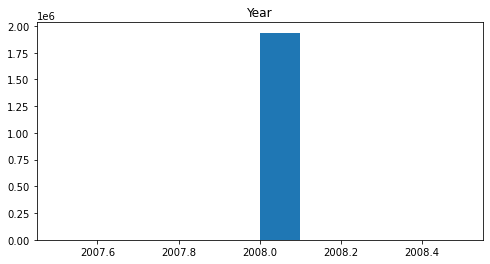

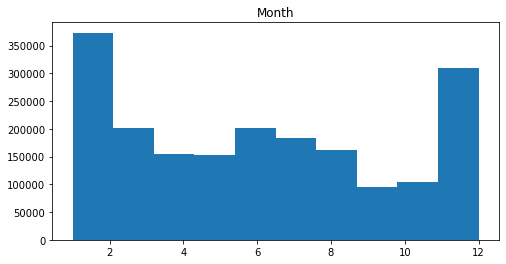

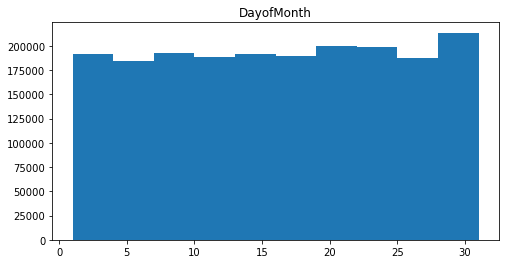

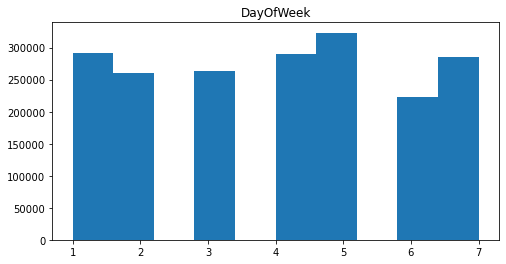

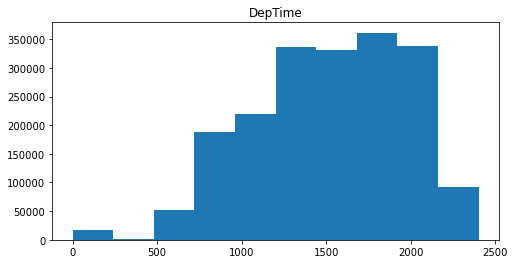

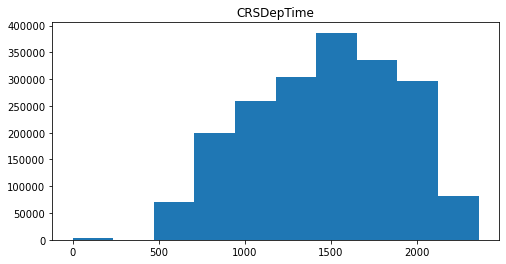

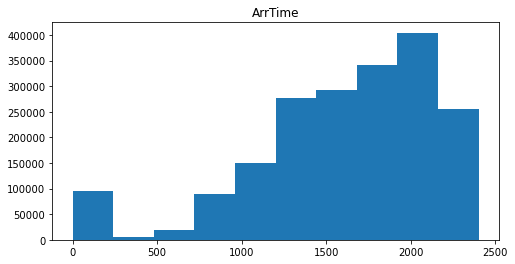

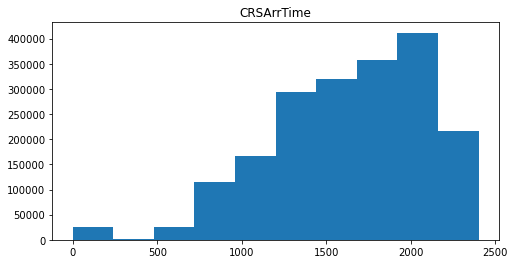

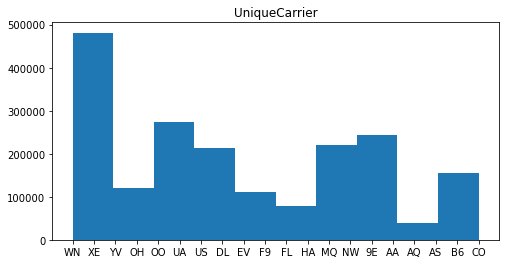

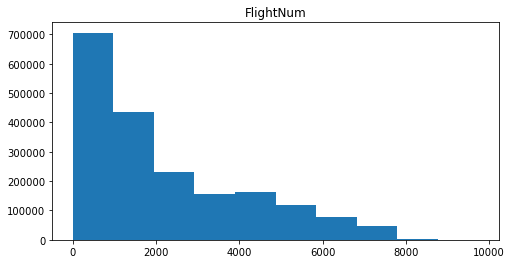

TypeError: 'value' must be an instance of str or bytes, not a float

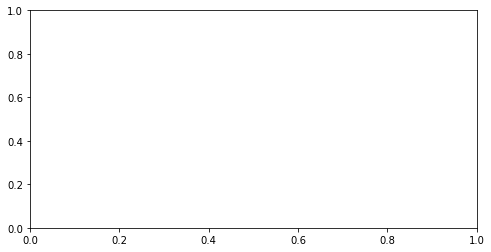

In [20]:
for col in df.columns:
    plt.figure(figsize=(8,4))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

### Notes


- **Airlines to keep**
- WN - Southwest  
- AA - American Airlines   
- MQ - Envoy   
- UA - United Airlines   
- OO - SkyWest   
- DL - Delta  


- **Airports to keep** 
- ATL - Atlanta
- ORD - Orlando
- DFW - Dallas(Fort Worth)
- DEN - Denver    
- LAX - Los Angeles    
